### Predicting subjective score (regression) Josh Selig

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_train.head()

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,"Tanzania, United Republic Of",300,Tanzanian Coffee Board,Arusha,Washed / Wet,7.67,7.50,7.33,7.25,...,7.75,82.83,0.11,0,0.0,Green,5,1400.0,1400.0,excellent
1,Arabica,Brazil,25,NUCOFFEE,Mundo Novo,Semi-washed / Semi-pulped,7.75,7.50,7.58,7.50,...,7.58,83.17,0.12,0,0.0,Blue-Green,3,1000.0,1000.0,excellent
2,Arabica,"Tanzania, United Republic Of",1,Africa Fine Coffee Association,Other,Washed / Wet,7.42,7.50,7.50,7.33,...,7.50,82.08,0.12,0,0.0,Green,3,1500.0,1700.0,excellent
3,Arabica,Costa Rica,250,Specialty Coffee Association of Costa Rica,Caturra,Washed / Wet,7.92,7.83,7.83,7.83,...,7.92,84.50,0.11,0,0.0,Green,0,1700.0,1700.0,excellent
4,Arabica,Colombia,100,Almacafé,Caturra,Washed / Wet,7.67,7.33,7.33,7.33,...,7.58,82.25,0.11,0,0.0,Green,0,1600.0,1950.0,excellent


In [3]:

df_train = df_train.drop(['In.Country.Partner', 'Country.of.Origin','Variety'], axis =1)
df_test = df_test.drop(['In.Country.Partner', 'Country.of.Origin','Variety'], axis =1)

In [4]:
X_train = df_train.drop(['Cupper.Points','quality','Total.Cup.Points'],axis = 1)
X_test = df_test.drop(['Cupper.Points','quality','Total.Cup.Points'],axis = 1)

y_train = df_train['Cupper.Points']
y_test = df_test['Cupper.Points']

In [5]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Decision Tree Regressor

In [6]:
grid = {'max_depth': np.arange(1, 30)}

tree = DecisionTreeRegressor()
treeCV = GridSearchCV(tree, param_grid=grid, return_train_score=True)
treeCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True)

In [7]:
#Best parameters
treeCV.best_params_
# Depending on each time you run, it comes up with a different best param. Lowest height thats good is 4

{'max_depth': 7}

In [8]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)
tree.score(X_test, y_test).round(3)
#Score of 63% for predictiing the subjective score

0.631

<AxesSubplot:>

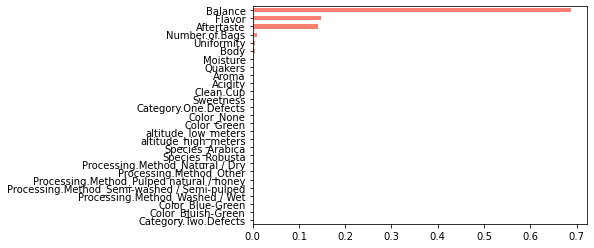

In [9]:
feature_importance = pd.Series(tree.feature_importances_,index= X_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

### Random Forest Regressor

In [10]:
grid = {'n_estimators': np.arange(100, 200, 20), 'max_depth': np.arange(1, 20)}

rf = RandomForestRegressor()
rfCV = GridSearchCV(rf, param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             return_train_score=True)

In [11]:
rfCV.best_params_

{'max_depth': 14, 'n_estimators': 120}

In [12]:
best_forest = rfCV.best_estimator_
best_forest.score(X_train, y_train)

0.9788133504559484

In [13]:
best_forest.score(X_test, y_test)

0.6639265590216735

<AxesSubplot:>

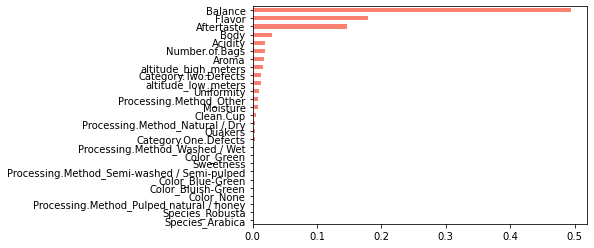

In [23]:
feature_importance = pd.Series(best_forest.feature_importances_,index= X_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

(array([ 17.,  37., 117., 160., 248., 290., 240., 114.,  16.,   5.]),
 array([5.97149319, 6.22661054, 6.48172788, 6.73684523, 6.99196258,
        7.24707993, 7.50219728, 7.75731462, 8.01243197, 8.26754932,
        8.52266667]),
 <BarContainer object of 10 artists>)

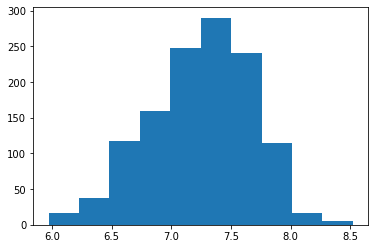

In [30]:
y_train_predict = best_forest.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)
plt.hist(y_train_predict)

(array([  3.,   0.,  15.,  55., 235., 266., 336., 241.,  82.,  11.]),
 array([5.17 , 5.511, 5.852, 6.193, 6.534, 6.875, 7.216, 7.557, 7.898,
        8.239, 8.58 ]),
 <BarContainer object of 10 artists>)

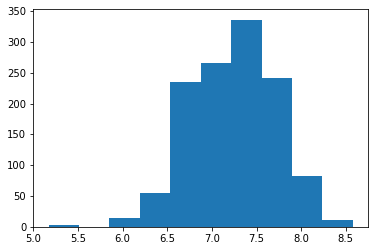

In [31]:
plt.hist(y_train)

In [ ]:
y_test_predict = 